In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import datapane


In [22]:
article = pd.read_csv("C:/msys64/home/for/10th/project_cusmos/hm_dataset/h&m dataset/articles_hm.csv") # articles_hm 상품
customer = pd.read_csv("C:/msys64/home/for/10th/project_cusmos/hm_dataset/h&m dataset/customer_hm.csv") # customer_hm 고객
transaction = pd.read_csv("C:/msys64/home/for/10th/project_cusmos/hm_dataset/h&m dataset/transactions_hm.csv") # transactions_hm 거래



transaction.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [4]:
# article.isnull().sum() # 제품 상세설명 null : 416

In [ ]:
TRnCU = transaction.merge(customer, on = 'customer_id', how = 'inner') #거래, 고객 inner join
All = TRnCU.merge(article, on = 'article_id', how = 'inner') # 거래고객, 상품 inner join

All.isnull().sum() # 모두 조인한 csv의 결측치

t_dat                              0
customer_id                        0
article_id                         0
price                              0
sales_channel_id                   0
month                              0
FN                                 0
Active                             0
club_member_status                 0
fashion_news_frequency             0
age                                0
product_code                       0
prod_name                          0
product_type_no                    0
product_type_name                  0
product_group_name                 0
graphical_appearance_no            0
graphical_appearance_name          0
colour_group_code                  0
colour_group_name                  0
perceived_colour_value_id          0
perceived_colour_value_name        0
perceived_colour_master_id         0
perceived_colour_master_name       0
department_no                      0
department_name                    0
index_code                         0
i

In [6]:
# channel_sales = All.groupby("sales_channel_id")["price"].sum()
# channel_sales.plot(kind="bar", title = "sales by chennel")
# plt.show()

# All["age_group"] = (All["age"] // 10) * 10
# age_sales = All.groupby("age_group")["price"].mean()
# age_sales.plot(kind="line", marker="o", title="Average Spending by age group")
# plt.show()


In [7]:
# customer

customer_id                    0
FN                             0
Active                         0
club_member_status             0
fashion_news_frequency         0
age                            0
t_dat                     695015
article_id                695015
price                     695015
sales_channel_id          695015
dtype: int64

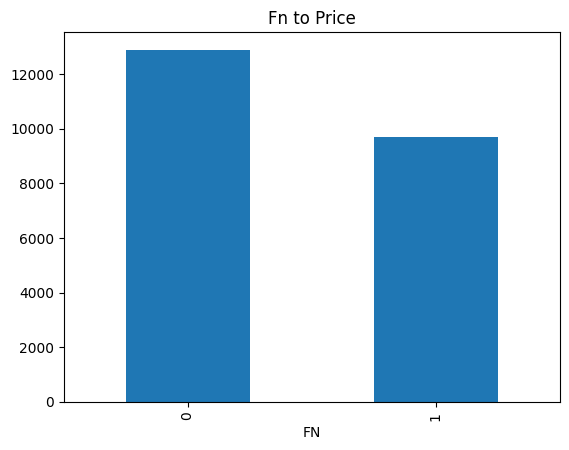

In [8]:
CnT = customer.merge(transaction, on = 'customer_id', how = 'inner')
fn_sales = CnT.groupby("FN")["price"].sum()  # 패션뉴스 구독률에 따른 매출량
# fn_sales = CnT.groupby("FN").count() # 행 개수
fn_sales.plot(kind = 'bar', title = "Fn to Price")

CnT2 = customer.merge(transaction, on = 'customer_id', how = 'left')
CnT2.isnull().sum()

<Axes: xlabel='month'>

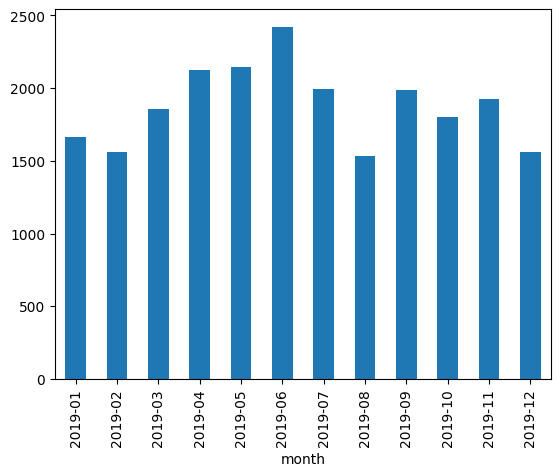

In [9]:
transaction["t_dat"] = pd.to_datetime(transaction["t_dat"]) # t_dat을 datetime타입으로 변환
transaction["month"] = transaction["t_dat"].dt.strftime("%Y-%m") #월별 컬럼 생성
CnT = customer.merge(transaction, on = 'customer_id', how = 'inner')


month_price = CnT.groupby("month")["price"].sum()
month_price.plot(kind = "bar") #월별 매출

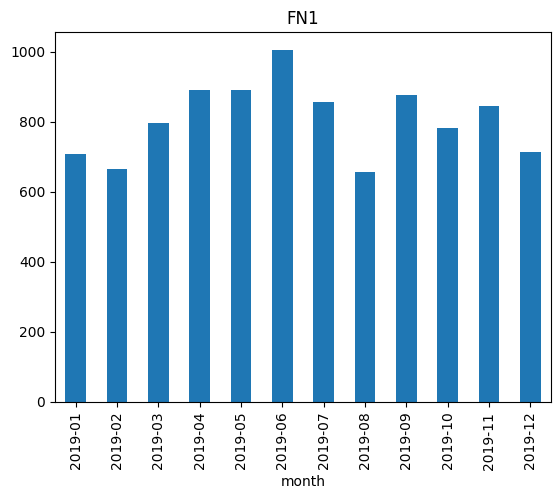

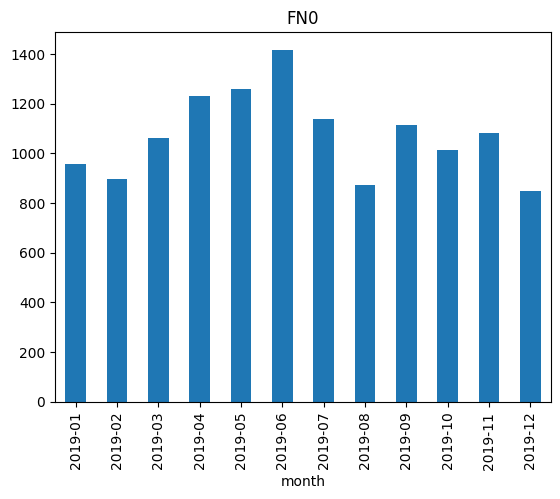

In [10]:
month_price_fn1 = (
    CnT.loc[CnT["FN"] == 1].groupby("month")["price"].sum()
)
month_price_fn1.plot(kind = "bar", title = "FN1") # 월별 매출, FN이 1인 경우
plt.show()

month_price_fn0 = (
    CnT.loc[CnT["FN"] == 0].groupby("month")["price"].sum()
)
month_price_fn0.plot(kind = "bar", title = "FN0")
plt.show()

<Axes: title={'center': 'month to fn to price'}, xlabel='month'>

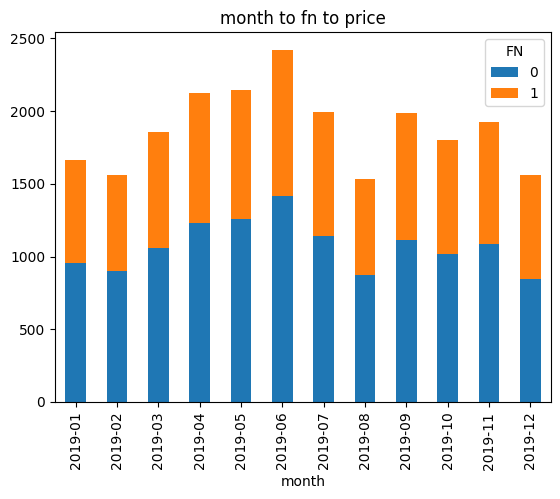

In [11]:
month_price_fn = (
    CnT.groupby(["month", "FN"])["price"].sum().unstack("FN", fill_value = 0)
)
month_price_fn.plot(kind = "bar", stacked=True, title = "month to fn to price")

<Axes: title={'center': 'month to saleschannel to price'}, xlabel='month'>

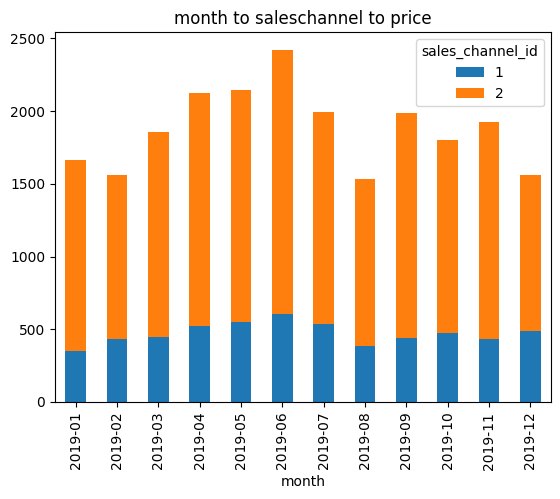

In [12]:
month_salescha = CnT.groupby(["month", "sales_channel_id"])["price"].sum()

month_sale_df = (
    month_salescha.unstack("sales_channel_id", fill_value=0).sort_index() # fill_value는 결측치를 채울 값
)
month_sale_df.plot(kind = "bar", stacked = True, title = "month to saleschannel to price")

Text(0.5, 1.0, 'maybe special price? : expensive purchase == M.10~12')

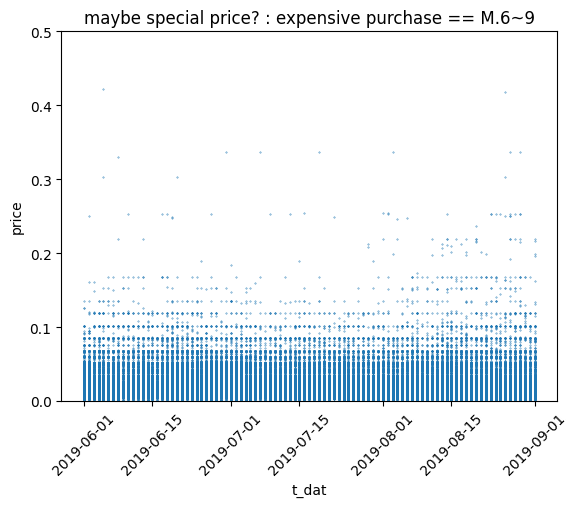

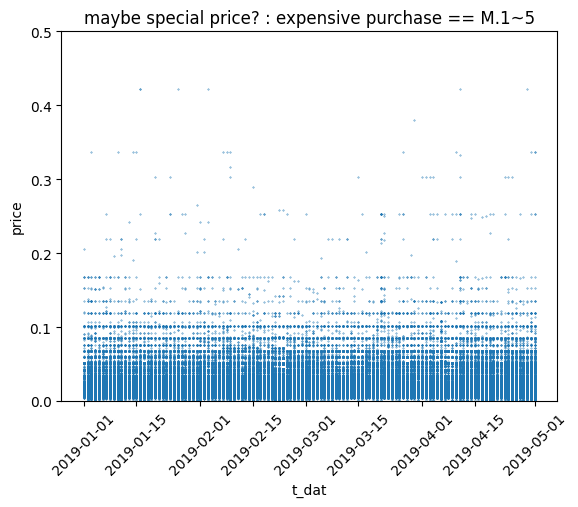

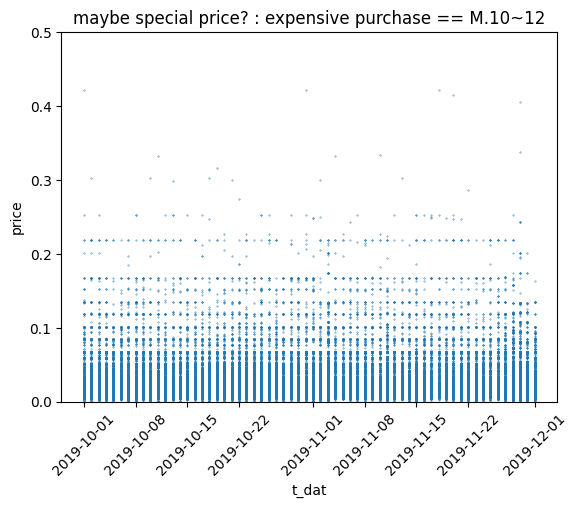

In [ ]:
## 특별히 비싼 물품을 구매했는가? : 1~5, 6~9, 10~12

mask1 = (CnT["t_dat"] >= "2019-06") & (CnT["t_dat"] <= "2019-09")
CnT_3m = CnT.loc[mask1].copy()

mask2 = (CnT["t_dat"] >= "2019-01") & (CnT["t_dat"] <= "2019-05")
CnT_6m = CnT.loc[mask2].copy()

mask3 = (CnT["t_dat"] >= "2019-10") & (CnT["t_dat"] <= "2019-12")
CnT_9m = CnT.loc[mask3].copy()

# 
CnT_3m.plot.scatter(
    x = "t_dat", y = "price", s = 0.1
)
plt.xticks(rotation = 45)
plt.ylim(0, 0.5)
plt.title("maybe special price? : expensive purchase == M.6~9")


CnT_6m.plot.scatter(
    x = "t_dat", y = "price", s = 0.1
)
plt.xticks(rotation = 45)
plt.ylim(0, 0.5)
plt.title("maybe special price? : expensive purchase == M.1~5")

CnT_9m.plot.scatter(
    x = "t_dat", y = "price", s = 0.1
)
plt.xticks(rotation = 45)
plt.ylim(0, 0.5)
plt.title("maybe special price? : expensive purchase == M.10~12")


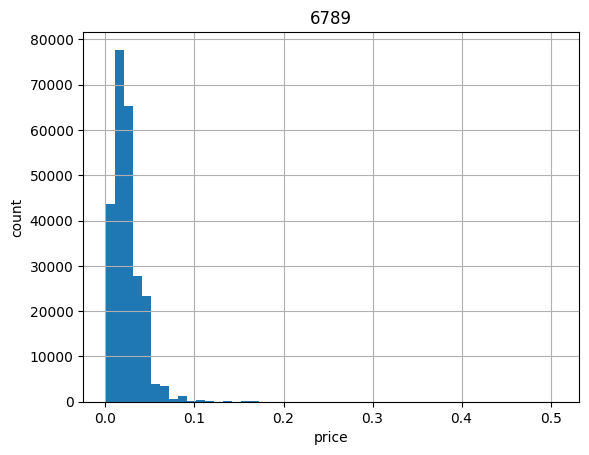

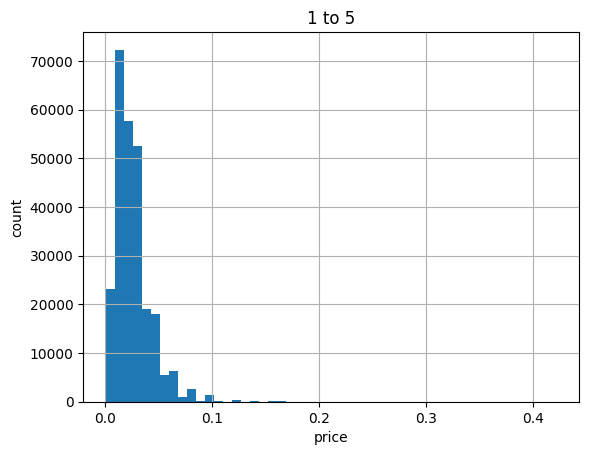

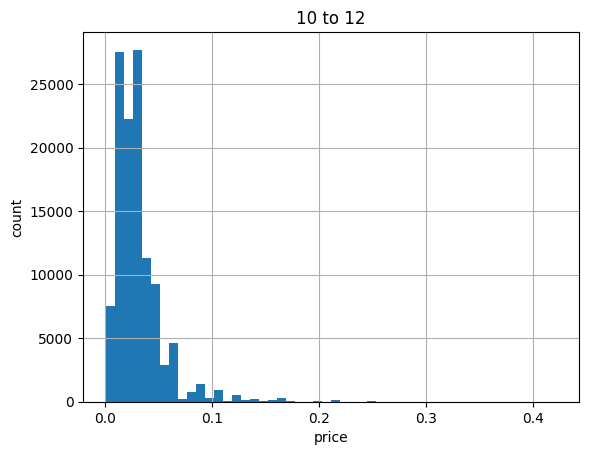

In [ ]:
## 그렇다면 많이 구매했는가? : 1~5, 6~9, 10~12 

CnT_3m["price"].hist(bins = 50)
plt.xlabel("price")
plt.ylabel("count")
plt.title("6789")
plt.show()

CnT_6m["price"].hist(bins = 50)
plt.xlabel("price")
plt.ylabel("count")
plt.title("1 to 5")
plt.show()

CnT_9m["price"].hist(bins = 50)
plt.xlabel("price")
plt.ylabel("count")
plt.title("10 to 12")
plt.show()

In [ ]:
# TnA = transaction.merge(article, on = "article_id", how = "inner")
# TnA["t_dat"] = pd.to_datetime(transaction["t_dat"])
# TnA["month"] = transaction["t_dat"].dt.strftime("%Y-%m") # TnA["t_dat"].info

# vip = TnA.groupby("customer_id")["price"].sum().plot(kind = "bar")
